In [55]:
import requests 
import pandas as pd
import os       
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [56]:
df=pd.read_csv('Data set after cleaning.csv')

### Linear Regression (test 1) 

In [57]:
regressor=LinearRegression()

X=df[df.columns[df.columns != 'Grade']]
Y=df[['Grade']]
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 ,random_state=42 )

regressor.fit(X_train , Y_train)

Y_pred=regressor.predict(X_test)

<AxesSubplot:xlabel='Grade'>

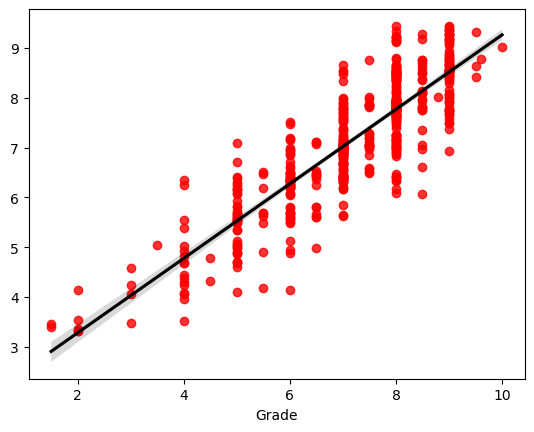

In [58]:
sns.regplot(Y_test, Y_pred, scatter_kws={'color':'red'}, line_kws={'color':'black'})

In [59]:
mse= mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
rmse

0.7298658178971937

In [60]:
pred=regressor.score(X_test,Y_test)
print(pred)

0.7513747951218565


### Linear Regression (test 2)

In [61]:
X=df[['Num Of comments','Num Of likes','Num of pros','Num of cons']]
Y=df[['Grade']]
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 ,random_state=42 )

regressor.fit(X_train , Y_train)
Y_pred=regressor.predict(X_test)

<AxesSubplot:xlabel='Grade'>

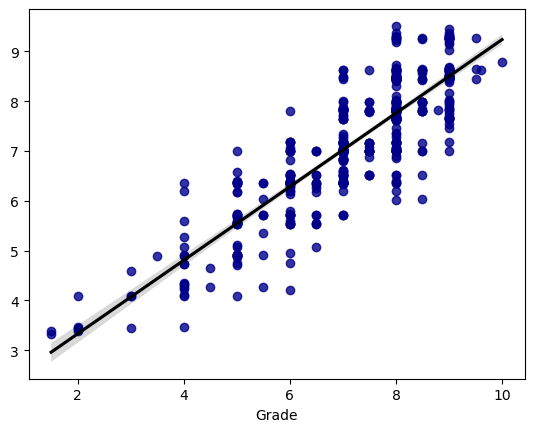

In [62]:
sns.regplot(Y_test, Y_pred, scatter_kws={'color':'darkblue'}, line_kws={'color':'black'})

In [63]:
mse= mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
rmse

0.7437643495982639

In [64]:
pred=regressor.score(X_test,Y_test)
print(pred)

0.7418157055665632


### Linear Regression (test 3 )

In [65]:
df1=df.copy()

In [66]:
df1["like_to_comment_ratio"] = df1['Num Of likes'] / df1["Num Of comments"]

df1 = df1.drop(labels=['Num Of likes'],axis=1)
df1 = df1.drop(labels=["Num Of comments"],axis=1)
#ניקיון של העמודה לייקים ותגובות (nan\inf)

df1 = df1.replace([np.inf, -np.inf], np.nan)
df1 = df1.dropna()
df1 = df1.dropna(subset=['like_to_comment_ratio'])
scaler = MinMaxScaler()
df1['like_to_comment_ratio'] = scaler.fit_transform(df1[['like_to_comment_ratio']])

df1

,Name of the game,Fit platform,Grade,Num of pros,Num of cons,First Released,The game rviewer,The date of the review,like_to_comment_ratio
0,0,1.0,9.0,5.0,4.0,2004.0,19,2022.0,0.002236
1,1,1.0,8.0,4.0,2.0,2008.0,73,2022.0,0.005168
2,2,1.0,5.0,3.0,3.0,2022.0,77,2022.0,0.001337
3,3,1.0,8.0,3.0,2.0,2022.0,77,2022.0,0.007994
4,4,1.0,6.0,3.0,3.0,2022.0,117,2022.0,0.006541
...,...,...,...,...,...,...,...,...,...
2879,2879,1.0,6.0,3.0,3.0,1987.0,85,2009.0,0.069767
2881,2881,1.0,7.5,3.0,2.0,2009.0,130,2009.0,0.046512
2882,2882,1.0,7.5,3.0,2.0,2009.0,130,2009.0,0.000000
2883,2883,1.0,7.0,3.0,3.0,2009.0,115,2009.0,0.069767


In [67]:
X=df1[df1.columns[df1.columns != 'Grade']]
Y=df1[['Grade']]
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 ,random_state=42 )

regressor.fit(X_train , Y_train)
Y_pred=regressor.predict(X_test)

<AxesSubplot:xlabel='Grade'>

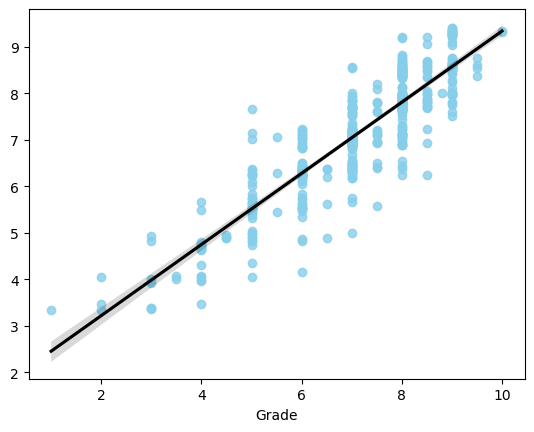

In [68]:
sns.regplot(Y_test, Y_pred, scatter_kws={'color':'skyblue'}, line_kws={'color':'black'})

In [69]:
mse= mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
rmse

0.6915504049191559

In [70]:
pred=regressor.score(X_test,Y_test)
print(pred)

0.7872632476873361


### Random Forest

In [71]:
X=df[df.columns[df.columns != 'Grade']]
Y=df[['Grade']]
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 ,random_state=42 )

In [72]:
#random Forest:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, Y_train)
print(regressor.score(X_test, Y_test))

0.7865628863095754
